In [62]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image

from genreclassification.utils import get_project_root

# example mel-spectrograms

In [23]:
genres = ["blues", "classical", "country", "disco",	"hiphop", "jazz", "metal", "pop", "reggae", "rock"]
nine_genres = genres.copy()
nine_genres.remove("rock")

In [12]:
mels = {}
for genre in genres:
    mels[genre] = Image.open(get_project_root()/f"data/images_original/{genre}/{genre}00007.png")

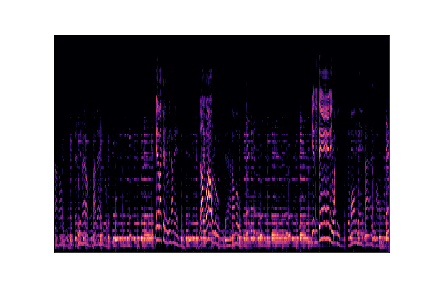

In [14]:
mels["blues"]

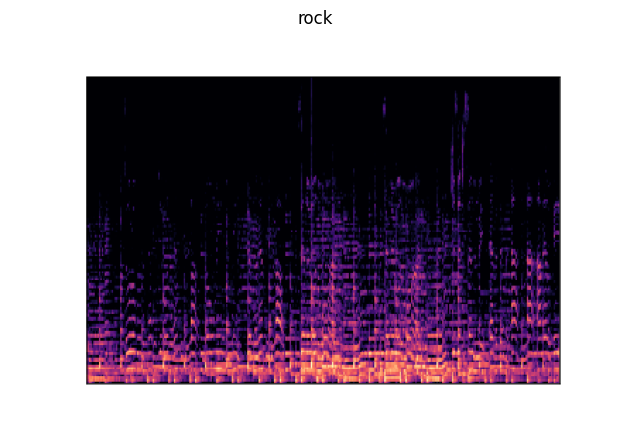

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(mels["rock"])
plt.axis("off")
ax.set_title("rock", pad=-15)

fig.tight_layout();

## plot 'rock' with axes/colourbar/etc.

In [57]:
# load the audio file and show raw data and sample rate
y, sr = librosa.load(
    get_project_root() / "data/genres_original/rock/rock.00007.wav"
)
print("Y is a numpy array:", y)
print("Shape of Y:", y.shape)
print("Sample Rate:", sr)

Y is a numpy array: [ 0.10076904  0.15240479  0.12155151 ... -0.00024414  0.00830078
  0.03182983]
Shape of Y: (661794,)
Sample Rate: 22050


In [60]:
# Use STFT on raw audio data
D = librosa.stft(y)
# convert from aplitude to decibel values by taking the absolute value of D in reference what the max value would be
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# see the shape of transformed data
print("New shape of transformed data", S_db.shape)

New shape of transformed data (1025, 1293)


In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f');

In [64]:
# apply mel spectogram without STFT
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128*2)
print("Shape of Mel Spectogram", S.shape)
# use that converting function as above
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

Shape of Mel Spectogram (256, 1293)


/var/folders/ng/4x8hyf_s39b2rqzs184hl_lr0000gp/T/ipykernel_31375/2245624977.py:2: FutureWarning: Pass y=[ 0.10076904  0.15240479  0.12155151 ... -0.00024414  0.00830078
  0.03182983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128*2)


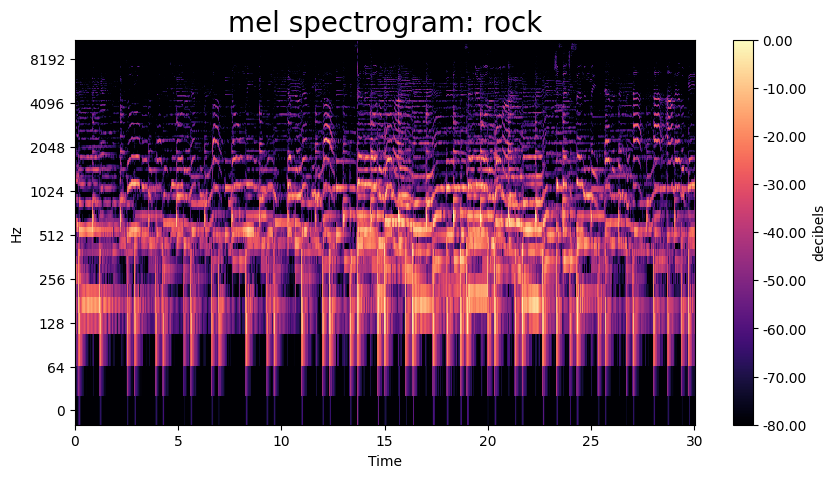

In [69]:
# plot the mel spectogram
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
ax.set_title('mel spectrogram: rock', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f', label="decibels");

In [71]:
# fig.savefig(
#     get_project_root() / "output/figures/mel-eg-rock.png"
# )